### UCI Adult Income Dataset _ Expl;oratory and Descriptive Analysis
This notebok is focused on the data exploratory and descriptive analysis and processing for hte UCI Adult Income dataset



In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import os 
import plotly.express as px

### Define and Create Paths

In [3]:
# Get working directory 
current_dir = os.getcwd()
# go to directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
# Define paths to the data folders 
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
# Define paths to the data folders
result_dir = os.path.join(project_root_dir, 'result')
# Define paths to docs folderabs
docs_dir = os.path.join(project_root_dir, 'docs')

# create directories if the do not eFile exists
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(result_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

### Read in the data

In [4]:
adult_data_filename = os.path.join(processed_dir, "adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation-grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collor,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collor,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary graduate,blue collor,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collor,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white color,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collor,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary graduate,white collor,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white color,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collor,north america,36-45


### Check the shape of the dataset and datatypes

In [5]:
adult_df.shape

(32533, 16)

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32533 entries, 0 to 32532
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32533 non-null  int64 
 1   workclass           32533 non-null  object
 2   fnlwgt              32533 non-null  int64 
 3   education_num       32533 non-null  int64 
 4   marital_status      32533 non-null  object
 5   relationship        32533 non-null  object
 6   race                32533 non-null  object
 7   sex                 32533 non-null  object
 8   capital_gain        32533 non-null  int64 
 9   capital_loss        32533 non-null  int64 
 10  hours_per_week      32533 non-null  int64 
 11  income              32533 non-null  object
 12  education_level     32533 non-null  object
 13  occupation-grouped  32533 non-null  object
 14  native_region       32533 non-null  object
 15  age_group           32533 non-null  object
dtypes: int64(6), object(10

## summary statistics 
### Numerical variables

In [7]:
adult_df.describe()       #  sumaries the numerical data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32533.000000,3.253300e+04,32533.000000,32533.000000,32533.000000,32533.000000
mean,38.587557,1.897849e+05,10.081640,1078.576338,87.378969,40.441306
std,13.637609,1.055601e+05,2.571689,7388.401928,403.125450,12.346494
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Categorical variables

In [8]:
adult_df.describe(include='object')       

,workclass,marital_status,relationship,race,sex,income,education_level,occupation-grouped,native_region,age_group
count,32533,32533,32533,32533,32533,32533,32533,32533,32533,32533
unique,6,4,5,5,2,2,7,9,6,7
top,private,married,male spouse,white,male,<=50k,secondary graduate,white collor,north america,26-35
freq,22670,14993,13187,27791,21774,24694,10494,11480,30037,8510


In [9]:
adult_df['workclass'].value_counts(normalize=True)


workclass
private          0.696831
government       0.133710
self-employed    0.112378
unknown          0.056435
voluntary        0.000430
unemployed       0.000215
Name: proportion, dtype: float64

In [10]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460855
single                   0.327760
divorced or separated    0.180863
widowed                  0.030523
Name: proportion, dtype: float64

In [11]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405342
single               0.360680
child                0.155627
female spouse        0.048197
extended relative    0.030154
Name: proportion, dtype: float64

#### Income Distribution

In [12]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24694
1,>50k,7839


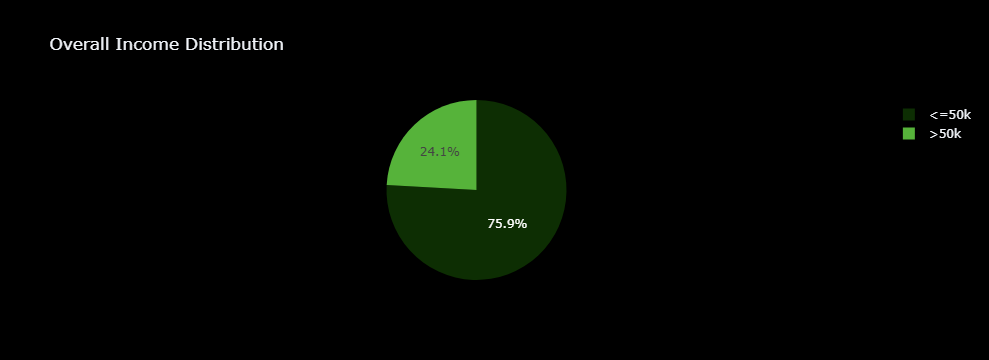

In [13]:
fig = px.pie(adult_df_income, names='income' , values='total', title='Overall Income Distribution',color_discrete_sequence=['#0d2e03', '#56b33a'])
fig.update_layout(
    template='plotly_dark',  # Safe background styling
    paper_bgcolor='black'
)
fig.show()
fig.write_image(os.path.join(result_dir, 'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_pie_chart.html'))

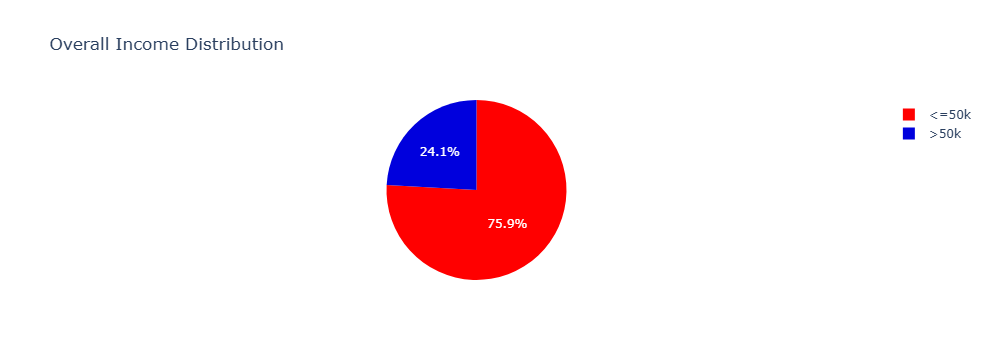

In [14]:
fig = px.pie(adult_df_income, names='income' , values='total', title='Overall Income Distribution', color_discrete_sequence=['red','#00D'])
fig.show()


In [15]:
adult_df_income_age= adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age')
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5337
1,18-25,>50k,114
2,26-35,<=50k,6919
3,26-35,>50k,1591
4,36-45,<=50k,5233
5,36-45,>50k,2772
6,46-60,<=50k,4480
7,46-60,>50k,2811
8,61-75,<=50k,1580
9,61-75,>50k,511


In [16]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age').sort_values(['age_group', 'income'])
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5337
1,18-25,>50k,114
2,26-35,<=50k,6919
3,26-35,>50k,1591
4,36-45,<=50k,5233
5,36-45,>50k,2772
6,46-60,<=50k,4480
7,46-60,>50k,2811
8,61-75,<=50k,1580
9,61-75,>50k,511


In [17]:
total_per_group = adult_df_income_age.groupby('age_group').size()
total_per_group

age_group
18-25    2
26-35    2
36-45    2
46-60    2
61-75    2
76+      2
<18      1
dtype: int64

In [18]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
total_per_group

0     5451
1     5451
2     8510
3     8510
4     8005
5     8005
6     7291
7     7291
8     2091
9     2091
10     240
11     240
12     945
Name: total_by_age, dtype: int64

In [19]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) * 100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5337,97.908641
1,18-25,>50k,114,2.091359
2,26-35,<=50k,6919,81.304348
3,26-35,>50k,1591,18.695652
4,36-45,<=50k,5233,65.371643
5,36-45,>50k,2772,34.628357
6,46-60,<=50k,4480,61.445618
7,46-60,>50k,2811,38.554382
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


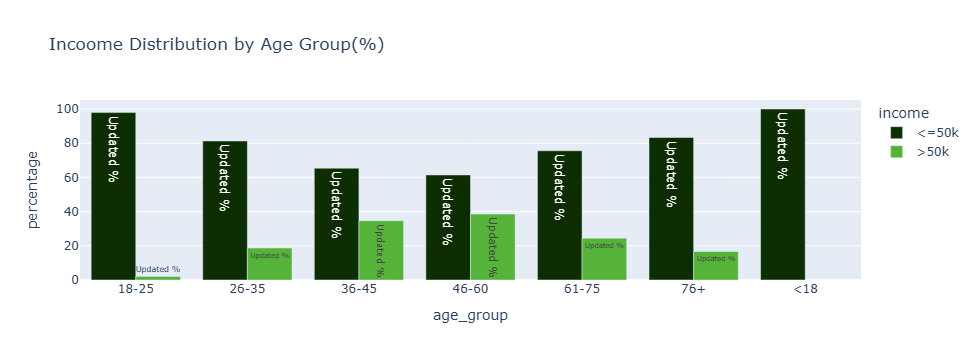

ValueError: Invalid format 'html'.
    Supported formats: ['png', 'jpg', 'jpeg', 'webp', 'svg', 'json', 'pdf']

In [20]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title='Incoome Distribution by Age Group(%)',
    barmode='group',
color_discrete_sequence=['#0d2e03', '#56b33a'],
)
fig.update_traces(texttemplate = 'Updated %')
fig.show()
fig.write_image(os.path.join(result_dir, 'income_distribution_by_agegroupchart.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_pie_chart.png'))
fig.write_image(os.path.join(result_dir, 'income_distribution_pie_chart.html'))


In [ ]:
themes = ["plotly", "ploty_white", "plotly_dark", "ggplot2","seasborn", "simple_white","presentation","xgridoff", "gridon", "none"]
for theme in themes:
    fig.update_layout(template=theme)
    fig.show() 

In [ ]:
pip install -U kaleido

In [ ]:
pip install -U plotly

In [ ]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

In [ ]:
total_per_region = adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income_distr']/total_per_region) * 100
adult_df_income_native_region

In [ ]:
fig = px.bar(
    adult_df_income_native_region,
    x = 'native_region',
    y = 'percentage',
    color = 'income',
    title='Incoome Distribution by native_region(%)',
    barmode='group',
    color_discrete_sequence=['#0d2e03', '#56b33a'],
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(result_dir, 'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_by_nativeregion_bar_plot.html'))


In [ ]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title='Incoome Distribution by Age Group(%)',
    barmode='group',
    color_discrete_sequence=['#0d2e03', '#56b33a'],
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(result_dir, 'income_distribution_by_agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_agegroup_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_by_agegroup_bar_plot.html'))


In [ ]:
# Group by native_region and income, count occurrences
adult_df_income_reg = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_reg')

# Calculate total per native_region
total_per_group = adult_df_income_reg.groupby('native_region')['total_income_reg'].transform('sum')

# Calculate percentage
adult_df_income_reg['percentage'] = (adult_df_income_reg['total_income_reg'] / total_per_group) * 100

# Plot the bar chart
fig = px.bar(
    adult_df_income_reg,
    x='native_region',
    y='percentage',
    color='income',
    title='Income Distribution by Native Region (%)',
    barmode='group',
    color_discrete_sequence=['#0d2e03', '#56b33a'],
    text='percentage'
)

# Format the text on bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(result_dir, 'income_distribution_by_race_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_race_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_by_race_bar_plot.html'))

In [ ]:
# Group by native_region and income, count occurrences
adult_df_income_reg = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_reg')

# Calculate total per native_region
total_per_group = adult_df_income_reg.groupby('race')['total_income_reg'].transform('sum')

# Calculate percentage
adult_df_income_reg['percentage'] = (adult_df_income_reg['total_income_reg'] / total_per_group) * 100

# Plot the bar chart
fig = px.bar(
    adult_df_income_reg,
    x='race',
    y='percentage',
    color='income',
    title='Income Distribution by Race (%)',
    barmode='group',
    color_discrete_sequence=['#0d2e03', '#56b33a'],
    text='percentage'
)

# Format the text on bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(result_dir, 'income_distribution_by_race_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_race_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_by_race_bar_plot.html'))

In [ ]:
adult_df_income_edu_occ = adult_df.groupby(['education_level', 'income','occupation-grouped']).size().reset_index(name='total').sort_values('total', ascending=False)
adult_df_income_edu_occ

In [ ]:
final_file = os.path.join(processed_dir, 'adult_cleaned.csv')
adult_df.to_csv(final_file, index=False)